<a href="https://colab.research.google.com/github/mvrsvara/2032-VARA-RAGHAVA-SAI/blob/master/Copy_of_Multidisease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Directory with our training pictures
train_COVID = os.path.join('/content/drive/MyDrive/colab notebook/data/train/COVID19')
train_PNEUMONIA = os.path.join('/content/drive/MyDrive/colab notebook/data/train/PNEUMONIA')
train_Normal= os.path.join('/content/drive/MyDrive/colab notebook/data/train/NORMAL')
train_Tuberculosis=os.path.join('/content/drive/MyDrive/colab notebook/data/train/Tuberculosis')

In [ ]:
train_COVID_names = os.listdir(train_COVID)
print(train_COVID_names[:10])

train_Pneumonia_names = os.listdir(train_PNEUMONIA)
print(train_Pneumonia_names[:10])

train_Normal_names = os.listdir(train_Normal)
print(train_Normal_names[:10])

train_Tuberculosis_names = os.listdir(train_Tuberculosis)
print(train_Tuberculosis_names[:10])

['COVID19(0).jpg', 'COVID19(1).jpg', 'COVID19(10).jpg', 'COVID19(102).jpg', 'COVID19(100).jpg', 'COVID19(101).jpg', 'COVID19(103).jpg', 'COVID19(104).jpg', 'COVID19(106).jpg', 'COVID19(105).jpg']
['PNEUMONIA(3173).jpg', 'PNEUMONIA(3176).jpg', 'PNEUMONIA(3175).jpg', 'PNEUMONIA(3177).jpg', 'PNEUMONIA(3178).jpg', 'PNEUMONIA(3179).jpg', 'PNEUMONIA(3180).jpg', 'PNEUMONIA(318).jpg', 'PNEUMONIA(3181).jpg', 'PNEUMONIA(3182).jpg']
['NORMAL(1244).jpg', 'NORMAL(1243).jpg', 'NORMAL(1246).jpg', 'NORMAL(1245).jpg', 'NORMAL(1248).jpg', 'NORMAL(1247).jpg', 'NORMAL(1249).jpg', 'NORMAL(125).jpg', 'NORMAL(1251).jpg', 'NORMAL(1252).jpg']
['Tuberculosis-1.png', 'Tuberculosis-10.png', 'Tuberculosis-100.png', 'Tuberculosis-101.png', 'Tuberculosis-103.png', 'Tuberculosis-104.png', 'Tuberculosis-102.png', 'Tuberculosis-106.png', 'Tuberculosis-105.png', 'Tuberculosis-108.png']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 8
ncols = 4

pic_index = 0

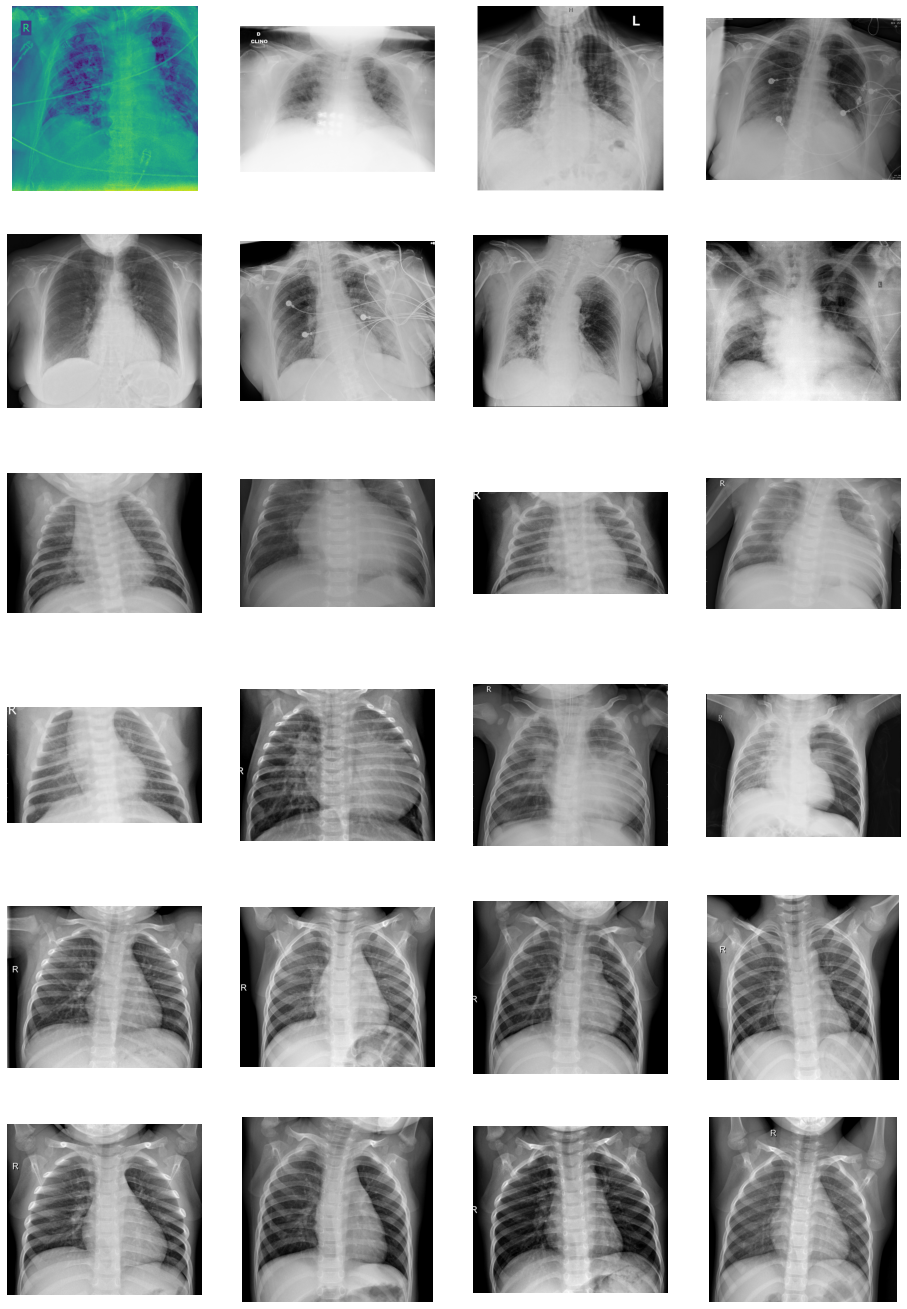

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_covid_pic = [os.path.join(train_COVID, fname) 
                for fname in train_COVID_names[pic_index-8:pic_index]]
next_pneumonia_pic = [os.path.join(train_PNEUMONIA, fname) 
                for fname in train_Pneumonia_names[pic_index-8:pic_index]]
next_Normal_pic = [os.path.join(train_Normal, fname) 
                for fname in train_Normal_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_covid_pic+next_pneumonia_pic+next_Normal_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       7

In [ ]:
if not os.path.isdir('models'):
    os.mkdir('models')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.05
        )

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab notebook/data/train',
        target_size=(150,150),
        batch_size=256,
        class_mode='categorical',
        subset='training'
        )

Found 5370 images belonging to 4 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab notebook/data/train',
        target_size=(150,150),
        batch_size=256,
        class_mode='categorical',
        subset='validation'
        )

Found 281 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/colab notebook/data/test',
        target_size=(150,150),
        batch_size=256,
        class_mode='categorical')

Found 1488 images belonging to 4 classes.


In [ ]:
history = model.fit(train_generator,validation_data=val_generator,epochs=30)

Epoch 1/30
21/21 [==============================] - 3077s 145s/step - loss: 1.2414 - accuracy: 0.5514 - val_loss: 1.0295 - val_accuracy: 0.6050
Epoch 2/30
21/21 [==============================] - 166s 8s/step - loss: 0.8615 - accuracy: 0.6533 - val_loss: 0.7141 - val_accuracy: 0.6868
Epoch 3/30
21/21 [==============================] - 166s 8s/step - loss: 0.6254 - accuracy: 0.7479 - val_loss: 0.6644 - val_accuracy: 0.7331
Epoch 4/30
21/21 [==============================] - 165s 8s/step - loss: 0.5166 - accuracy: 0.7924 - val_loss: 0.6698 - val_accuracy: 0.7331
Epoch 5/30
21/21 [==============================] - 168s 8s/step - loss: 0.4718 - accuracy: 0.8259 - val_loss: 0.5057 - val_accuracy: 0.8078
Epoch 6/30
15/21 [====================>.........] - ETA: 45s - loss: 0.4424 - accuracy: 0.8344

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/model1.h5')

In [ ]:
model=load_model('/content/drive/MyDrive/Colab Notebooks/models/model1.h5')

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2918829619884491, 0.9079301357269287]

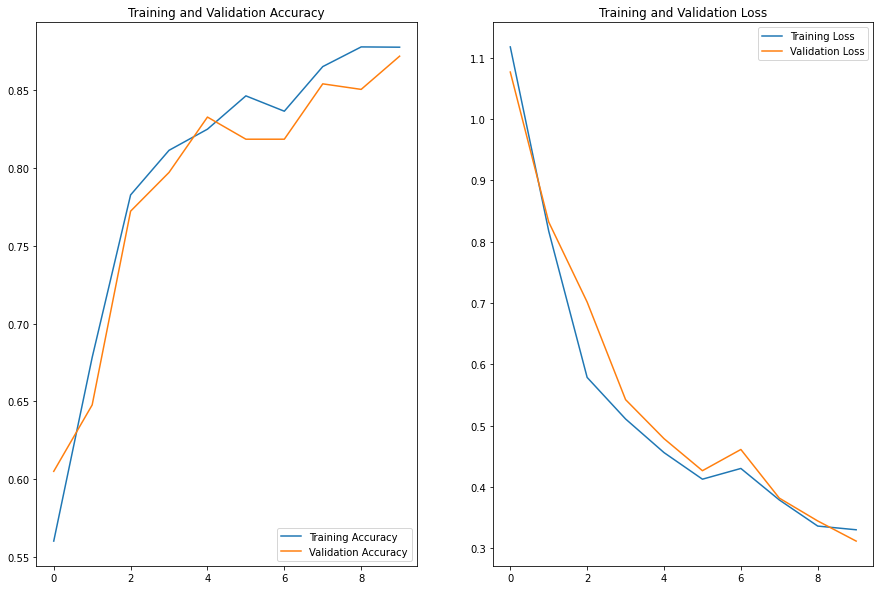

In [ ]:
import matplotlib.pyplot as plt
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()